## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from plotnine import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

# from google.colab import files 

## Import the dataset

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Checking for null values

In [4]:
data.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


## Summary of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Dimension of the dataset 

In [6]:
data.shape

(9994, 13)

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Checking of the duplicate values

In [8]:
data.duplicated().sum()

17

## Droping the duplicated values

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.shape

(9977, 13)

## Finding the unique values

In [11]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Removing the irrevelant data

In [12]:
drop = data.drop(columns = 'Postal Code', axis=1, inplace =True)

In [13]:
data

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## plotting the correlation between the features

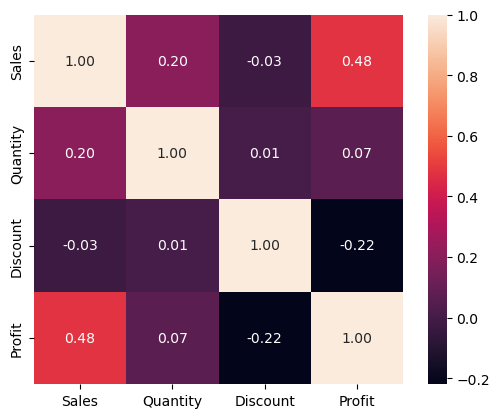

In [14]:
sns.heatmap(data = data.corr(), annot = True, fmt = '.2f', square = True);

## Visulization of the data

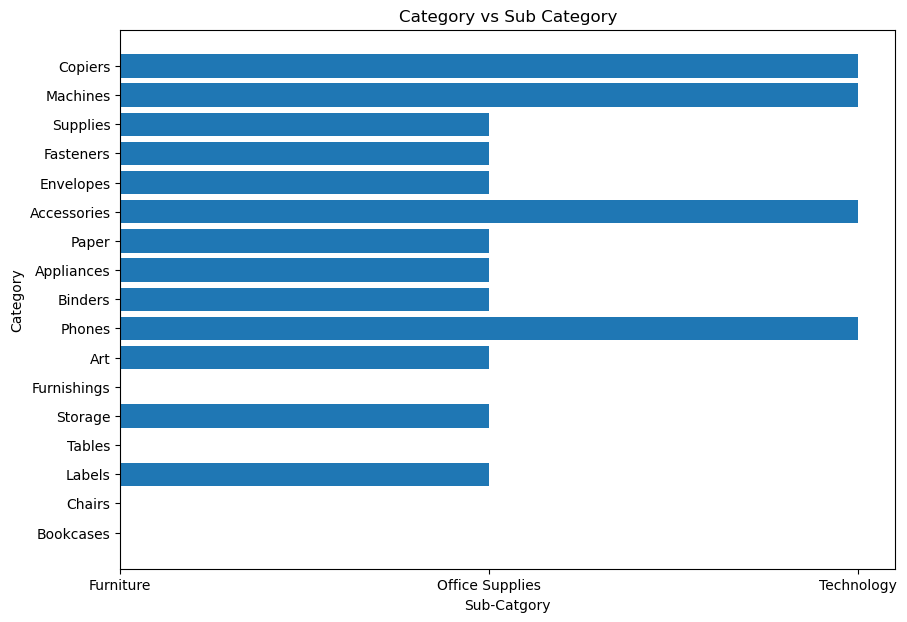

In [15]:
plt.figure(figsize = (10,7))
plt.barh('Sub-Category','Category', data = data)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.show()

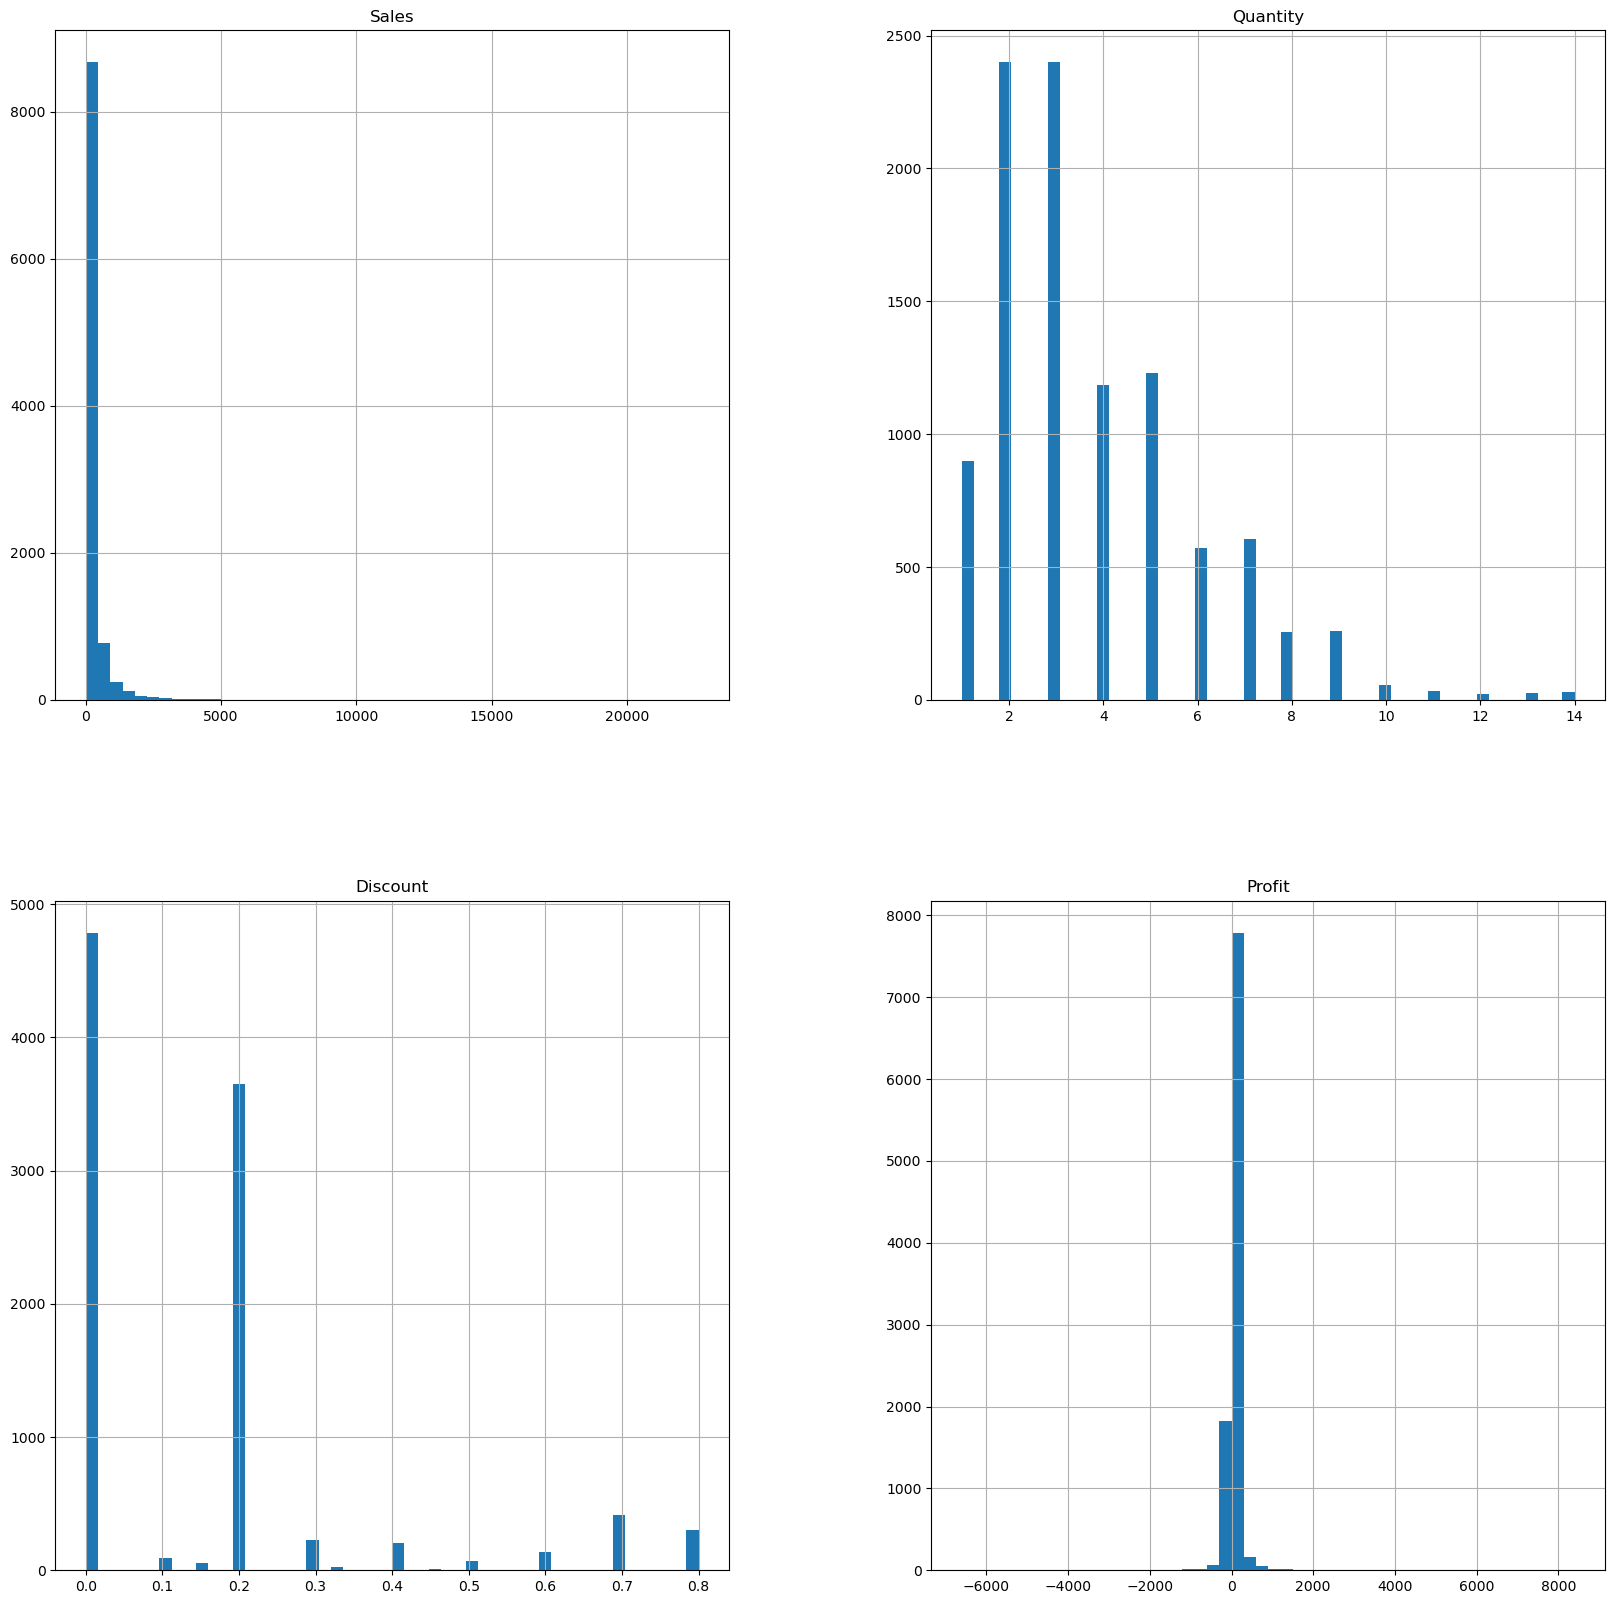

In [16]:
data.hist(bins = 50, figsize = (20,20))
plt.show()

In [17]:
segment = (data['Segment'].value_counts() / len(data['Segment']) * 100)
segment

Consumer       51.949484
Corporate      30.219505
Home Office    17.831011
Name: Segment, dtype: float64

<AxesSubplot:title={'center':'Segment'}>

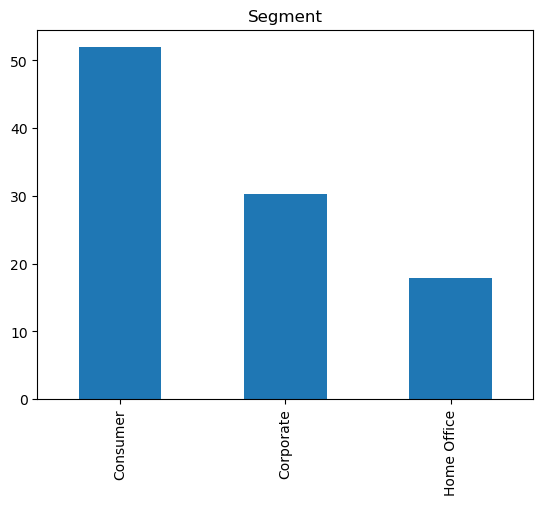

In [18]:
segment.plot(kind = 'bar', title = 'Segment')

#### here, we can see that 50% people belong to the consumer class, 30% of people belong to the corporate class whereas the remainig 20% of the people are from the home office class.

In [19]:
ship_mode = (data['Ship Mode'].value_counts() / len(data['Ship Mode']) * 100)
ship_mode

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

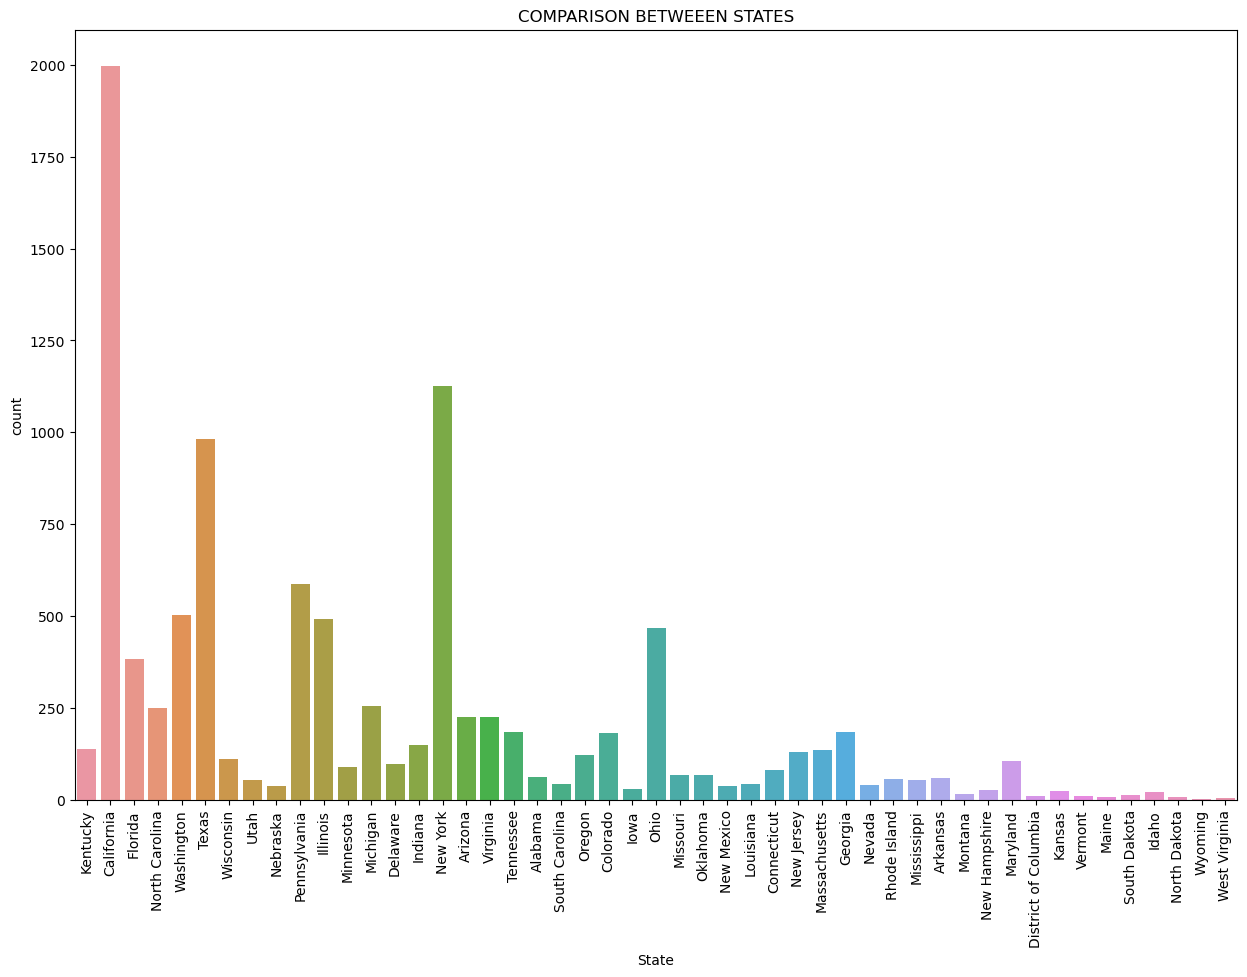

In [20]:
plt.figure(figsize = (15,10))
sns.countplot(x = data['State'])
plt.title("COMPARISON BETWEEEN STATES")
plt.xticks(rotation = 90)
plt.show()

In [21]:
category = (data['Category'].value_counts() / len(data['Category']) * 100)
category

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

<AxesSubplot:title={'center':'category'}>

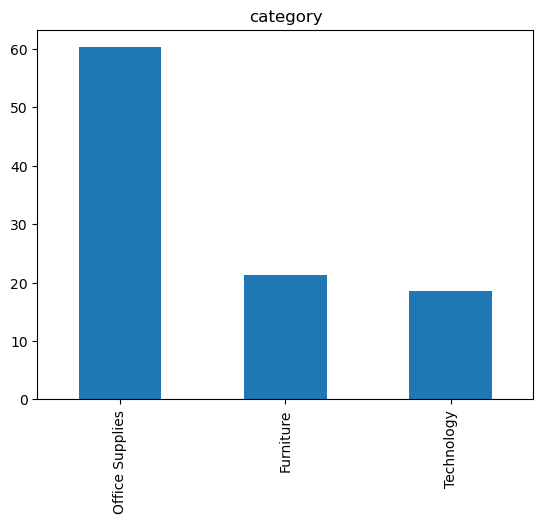

In [22]:
category.plot(kind = 'bar', title = 'category')

#### we can see that nearly 60% belongs to office supplies and approximately 20% belongs to each furniture as well as the technology category.

<function matplotlib.pyplot.show(close=None, block=None)>

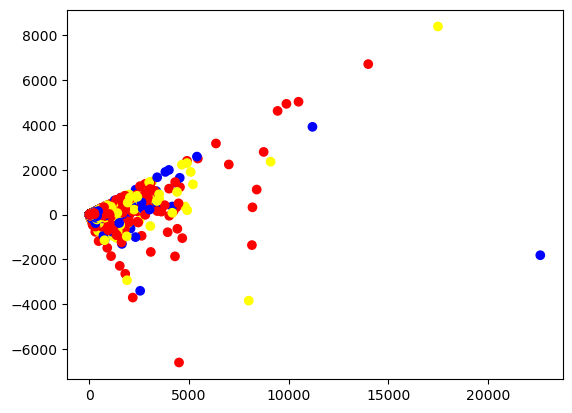

In [23]:
fig, ax = plt.subplots()
colors = {'Consumer' : 'red','Corporate' : 'yellow', 'Home Office' : 'blue'}
ax.scatter(data['Sales'], data['Profit'], c = data['Segment'].apply(lambda x:colors[x]))
plt.show

#### from the above observation we can say that consumer segment has more profit

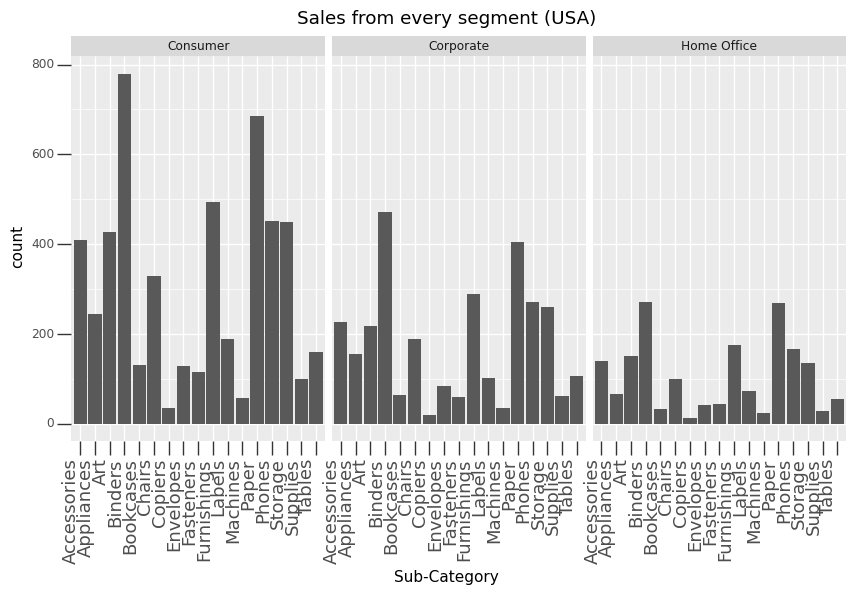

<ggplot: (141153468663)>

In [24]:
flip_xlabels = theme(axis_text_x = element_text(angle = 90, hjust = 1), figure_size = (10,5), axis_ticks_length_major = 10, axis_ticks_length_minor = 5)

(ggplot(data, aes(x = 'Sub-Category', fill = 'Sales')) + geom_bar() + facet_wrap(['Segment']) + flip_xlabels + theme(axis_text_x = element_text(size = 13)) + ggtitle("Sales from every segment (USA)"))

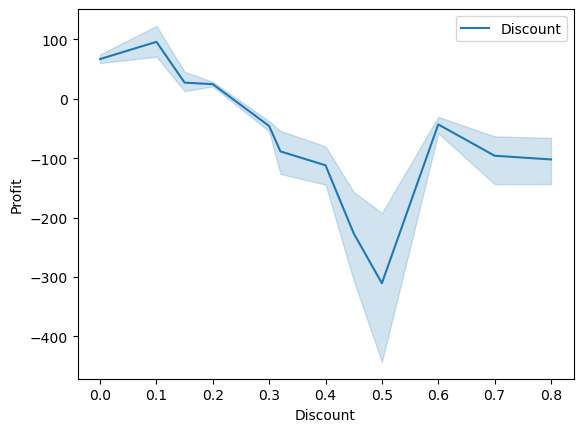

In [25]:
sns.lineplot('Discount', 'Profit', data = data , label = 'Discount')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

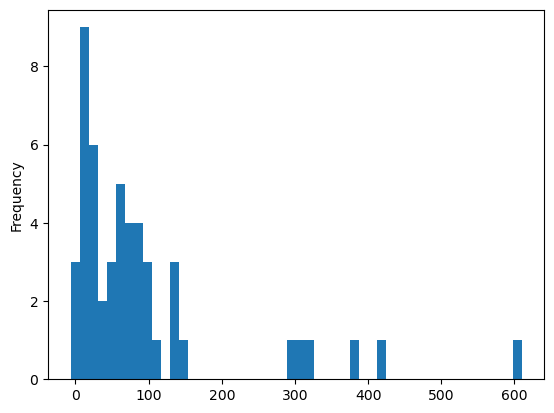

In [26]:
temp_data = data.loc[(data['Segment'] == 'Consumer') & (data['Discount'] == 0.1)]
temp_data['Profit'].plot.hist(bins = 50)

<AxesSubplot:ylabel='Frequency'>

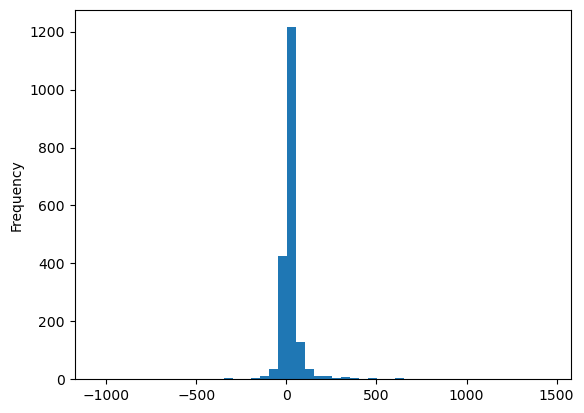

In [27]:
temp_data = data.loc[(data['Segment'] == 'Consumer') & (data['Discount'] == 0.2)]
temp_data['Profit'].plot.hist(bins = 50)

<AxesSubplot:ylabel='Frequency'>

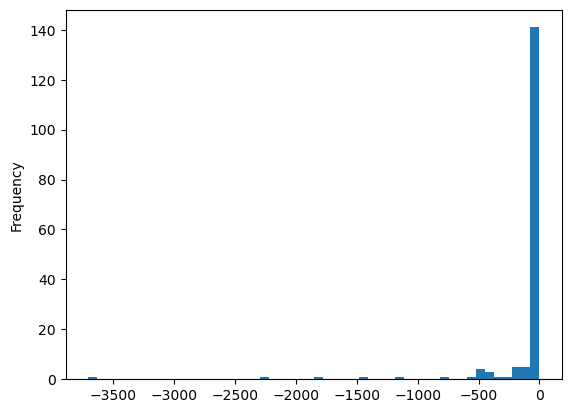

In [28]:
temp_data = data.loc[(data['Segment'] == 'Consumer') & (data['Discount'] == 0.8)]
temp_data['Profit'].plot.hist(bins = 50)

#### here, we can say that when the superstore is offering discount less than 40%, it is getting profit as depicted by thr  above graphs.

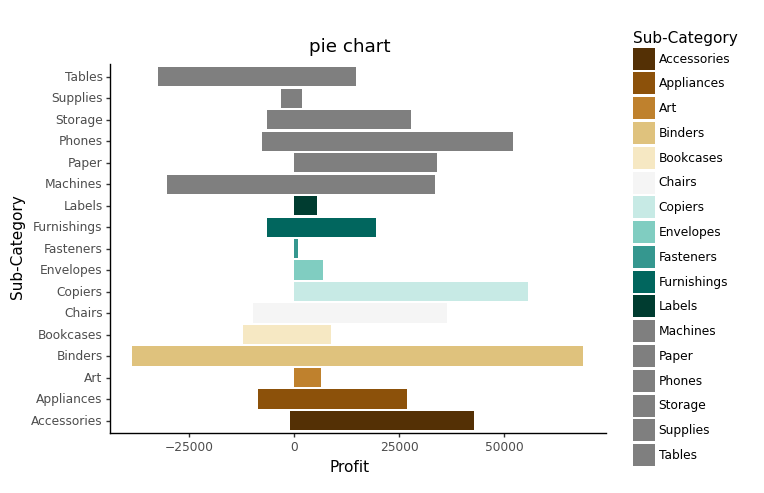

<ggplot: (141154451182)>

In [29]:
Profit_plot = (ggplot(data, aes(x = 'Sub-Category', y = 'Profit', fill = 'Sub-Category')) + geom_col() + coord_flip() + scale_fill_brewer(type = 'div', pelette = 'Spectral') + theme_classic() + ggtitle('pie chart'))
display(Profit_plot)

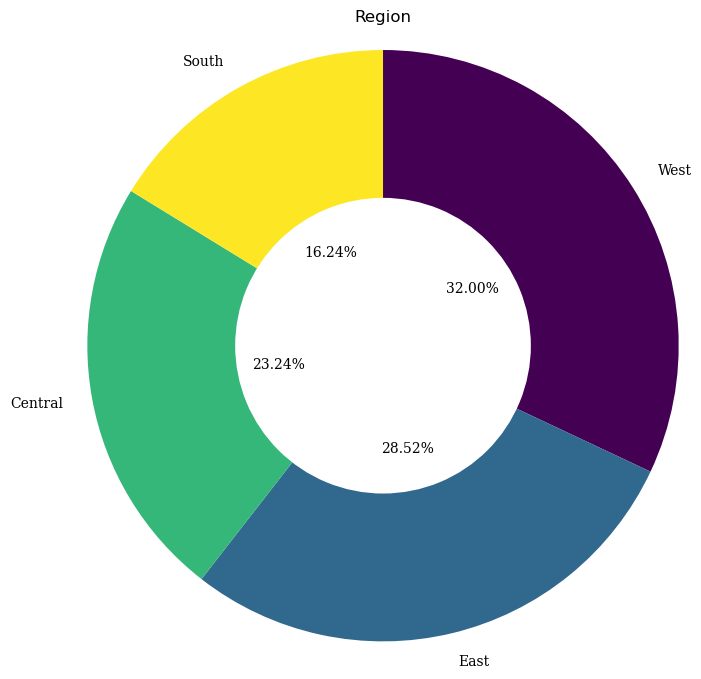

In [30]:
# pie plot of 'Region'
x = data['Region'].value_counts(normalize=True).plot.pie(autopct='%.2f%%', pctdistance=.36, radius=2, counterclock=False, 
                                                       startangle=90, textprops=dict(family='serif'), cmap='viridis')
plt.pie(x=[1], radius=1, colors=['w'])
plt.title('Region', pad=100)
plt.ylabel(' ');

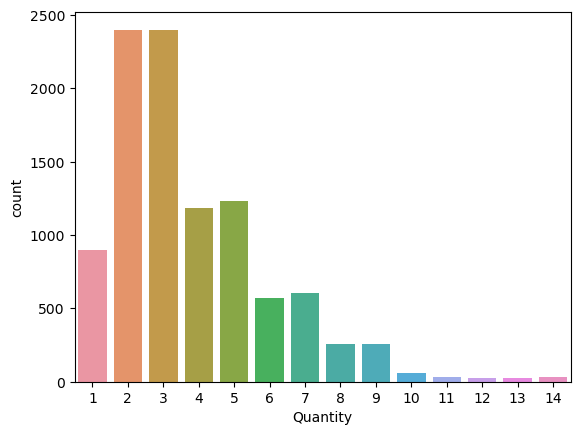

In [31]:
sns.countplot(data = data, x = 'Quantity');

## Analysis of the sales

In [32]:
def state_data_viewer(states):
    product_data = data.groupby(['State'])
    for state in states:
        df = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (20,4))
        fig.suptitle(state, fontsize = 14)
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = df.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index += 1
        
        fig.show()

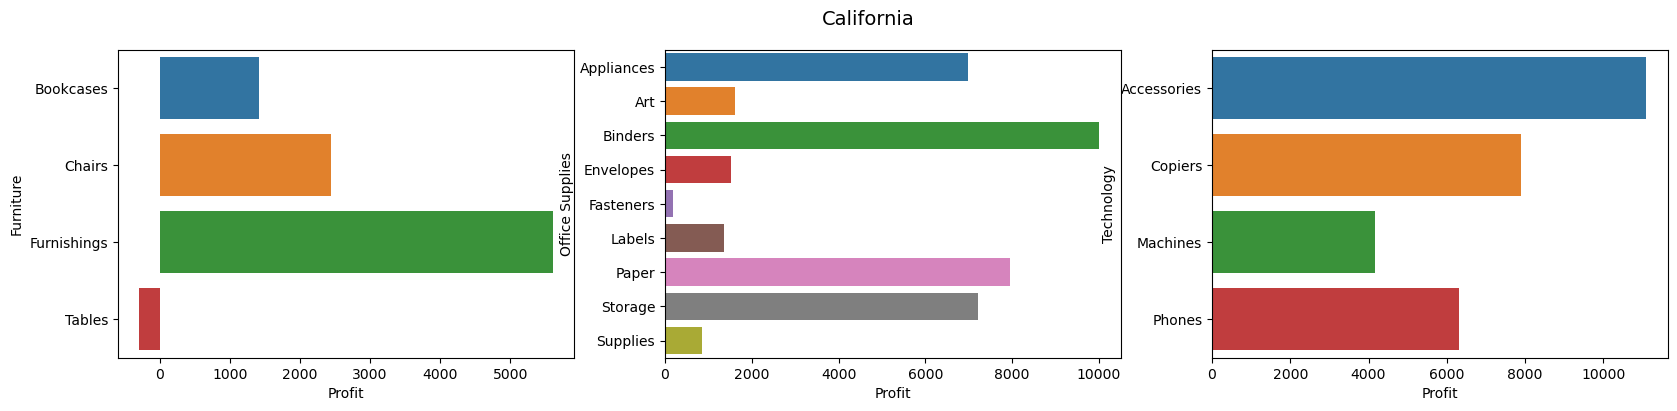

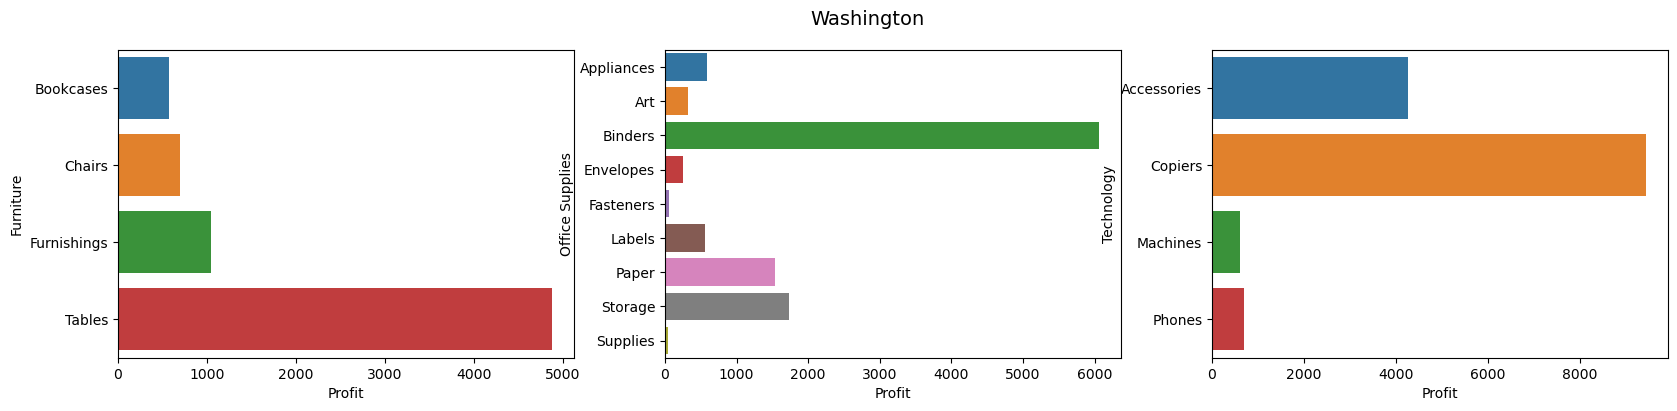

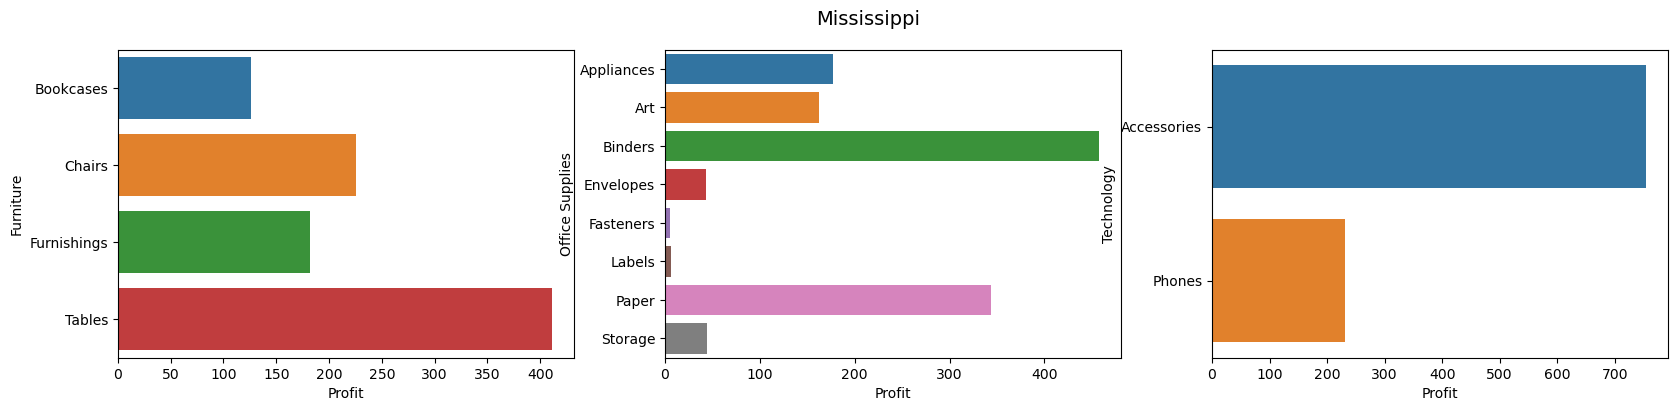

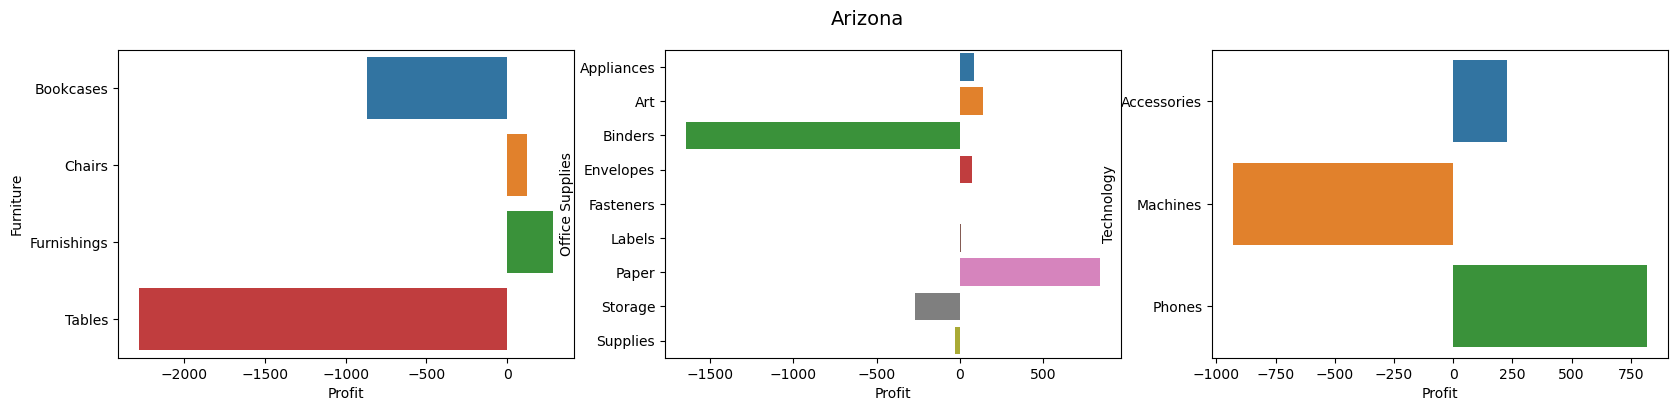

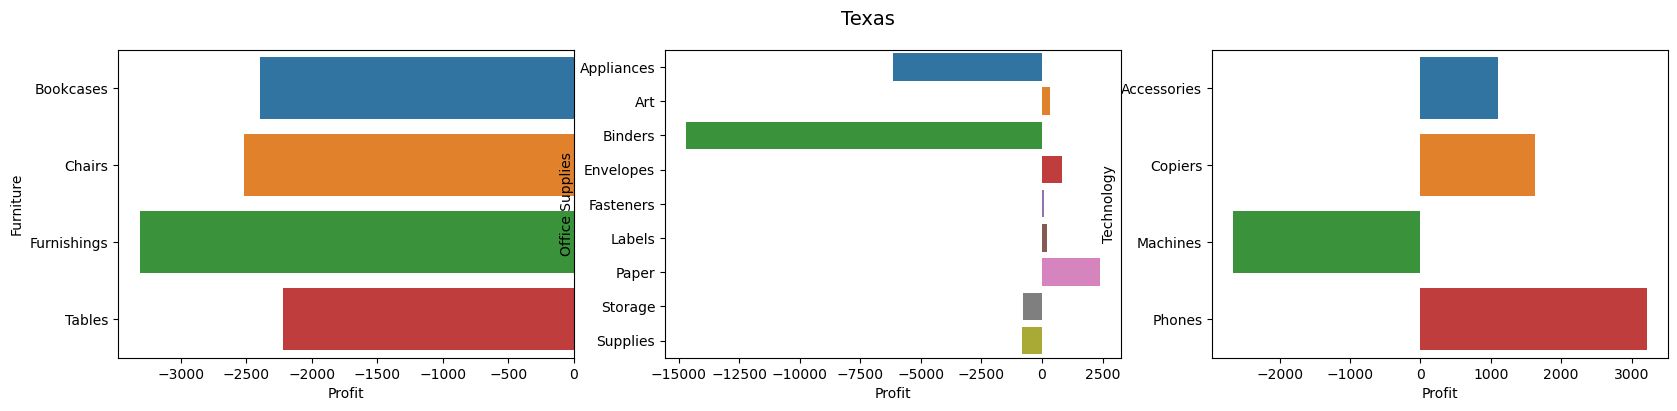

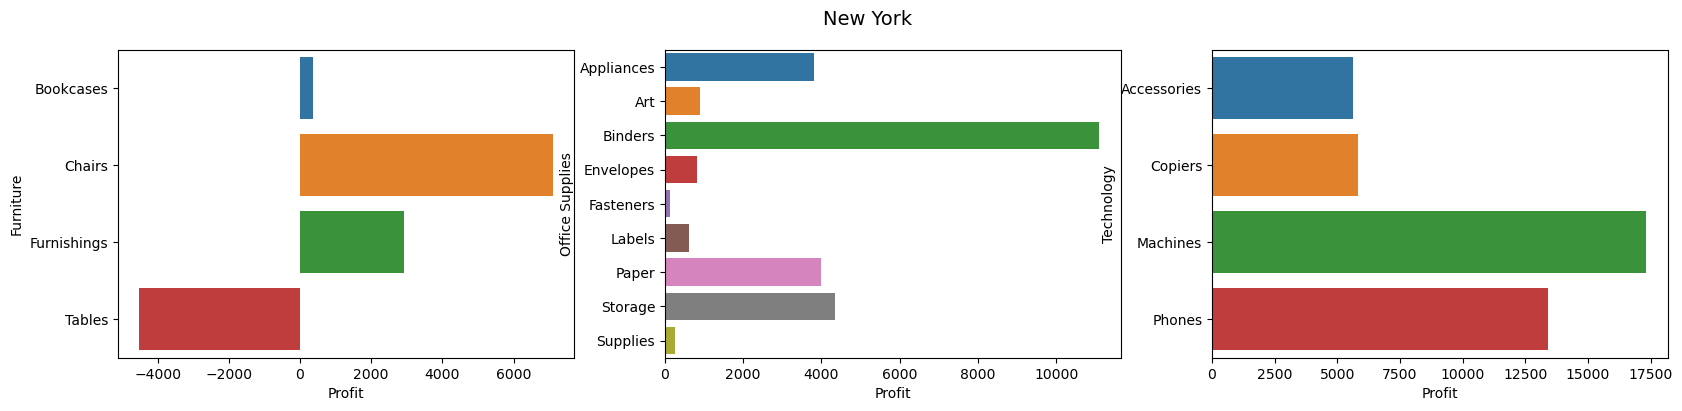

In [33]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas', 'New York']
state_data_viewer(states)